### Problem Statement
Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. Data mining techniques are employed to predict the trip duration of rental bikes in Seoul Bike sharing system. The rental duration prediction needs to be carried out with the combination of Seoul Bike data and weather data.

### Importing the Libraries 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
from datetime import date,time
import matplotlib.pyplot as plt
%matplotlib inline

### About the DataSet

The Data used include trip duration, trip distance, pickup-dropoff latitude and longitude, temperature, precipitation, wind speed, humidity, solar radiation, snowfall, ground temperature and 1-hour average dust concentration.

### Loading the dataset

In [2]:
data = pd.read_csv("Data.csv")
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25


## Exploratory Data Analysis 

### Lets see how the dataset is i.e. what are the columns, their data distribution, data type etc

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Duration    1048575 non-null  int64  
 1   Distance    1048575 non-null  int64  
 2   PLong       1048575 non-null  float64
 3   PLatd       1048575 non-null  float64
 4   DLong       1048575 non-null  float64
 5   DLatd       1048575 non-null  float64
 6   Haversine   1048575 non-null  float64
 7   Pmonth      1048575 non-null  int64  
 8   Pday        1048575 non-null  int64  
 9   Phour       1048575 non-null  int64  
 10  Pmin        1048575 non-null  int64  
 11  PDweek      1048575 non-null  int64  
 12  Dmonth      1048575 non-null  int64  
 13  Dday        1048575 non-null  int64  
 14  Dhour       1048575 non-null  int64  
 15  Dmin        1048575 non-null  int64  
 16  DDweek      1048575 non-null  int64  
 17  Temp        1048575 non-null  float64
 18  Precip      1048575 no

### Observations

From the dataset, we can observe that there are no missing values i.e 'nan' values in the dataset. All the columns are either integer or float format.

In the given dataset there are 2 types of data. They are numerical and categorical. The columns Pmonth, Pday, Phour, Pmin, PDweek, Dmonth, Dday, Dhour, Dmin, DDweek are categorical and the columns Duration, Distance, Haversine, Temp, Precip, Wind, Humid, Solar, Snow, GroundTemp, Dust are numerical.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,1048575.0,24.320891,24.049346,2.000000,7.000000,15.000000,34.000000,119.000000
Distance,1048575.0,3515.900080,3680.283721,10.000000,1210.000000,2210.000000,4360.000000,33290.000000
PLong,1048575.0,37.548462,0.041267,37.443340,37.520271,37.549904,37.573307,37.689720
PLatd,1048575.0,126.987442,0.076598,126.798599,126.922523,126.983589,127.053856,127.177612
DLong,1048575.0,37.548335,0.041196,37.443340,37.520271,37.549549,37.573277,37.689720
DLatd,1048575.0,126.987379,0.077018,126.798599,126.921333,126.983063,127.054298,127.177612
Haversine,1048575.0,1.841706,1.917255,0.000000,0.694159,1.254949,2.342533,25.362027
Pmonth,1048575.0,2.822669,0.999012,1.000000,2.000000,3.000000,4.000000,4.000000
Pday,1048575.0,14.422043,8.747411,1.000000,7.000000,13.000000,22.000000,31.000000
Phour,1048575.0,13.998915,5.825676,0.000000,10.000000,15.000000,18.000000,23.000000


### Observations

The haversine determines the great-circle distance between two points on a sphere given their longitudes and latitudes. i.e the minimum distance between pick-up latitude and longitude to the drop of latitude and longitude.

As no prior information is provided for the duration column i.e the duration is in minutes or hours for this instance I am considering them as the number of minutes. 

Even the distance column has no related information i.e. is it in km or meters as Seoul odometers have distance in km, not miles. For this time I am assuming the distance to be in meters as 33290(max of duration)/119(max of time) = 279.7 km/min which is impossible for a bike.

### Lets check if our assumption is right or wrong.

In [5]:
PDATE = []
for m, d in zip(data.Pmonth, data.Pday):
    PDATE.append(date(2018, m, d))
data['PDate'] = PDATE

DDATE = []
for m, d in zip(data.Dmonth, data.Dday):
    DDATE.append(date(2018, m, d))
data['DDate'] = DDATE

In [6]:
PTime = []
for h, m in zip(data.Phour, data.Pmin):
    PTime.append(time(h, m, 0))
data['PTime'] = PTime

DTime = []
for h, m in zip(data.Dhour, data.Dmin):
    DTime.append(time(h, m, 0))
data['DTime'] = DTime

In [7]:
data.head().T

,0,1,2,3,4
Duration,3,24,8,8,4
Distance,50,7670,1390,1820,850
PLong,37.5447,37.5062,37.5446,37.5711,37.5732
PLatd,126.888,127.004,127.057,127.024,127.016
DLong,37.5447,37.5513,37.537,37.5614,37.5658
DLatd,126.888,127.035,127.061,127.035,127.016
Haversine,0,5.71353,0.913702,1.46803,0.823227
Pmonth,1,1,1,1,1
Pday,1,1,1,1,1
Phour,0,0,0,0,0


In [8]:
data['PDuration'] = pd.to_datetime(data.PDate.astype(str)+' '+data.PTime.astype(str))
data['DDuration'] = pd.to_datetime(data.DDate.astype(str)+' '+data.DTime.astype(str))

In [9]:
data["Actual_Duration"] = (data.DDuration - data.PDuration).dt.total_seconds() / 60
data.head().T

,0,1,2,3,4
Duration,3,24,8,8,4
Distance,50,7670,1390,1820,850
PLong,37.5447,37.5062,37.5446,37.5711,37.5732
PLatd,126.888,127.004,127.057,127.024,127.016
DLong,37.5447,37.5513,37.537,37.5614,37.5658
DLatd,126.888,127.035,127.061,127.035,127.016
Haversine,0,5.71353,0.913702,1.46803,0.823227
Pmonth,1,1,1,1,1
Pday,1,1,1,1,1
Phour,0,0,0,0,0


### Observations
Therefore the duration is in minutes and the distance is in meters.

### Lets look at how the distributed accross varios columns.

In [10]:
data.Distance = data.Distance/1000
columns = ['Duration','Distance','Haversine','Pmonth','Pday','Phour','Pmin','PDweek','Dmonth','Dday','Dhour','Dmin','DDweek',
          'Temp','Precip','Wind','Humid','Solar','Snow','GroundTemp','Dust']

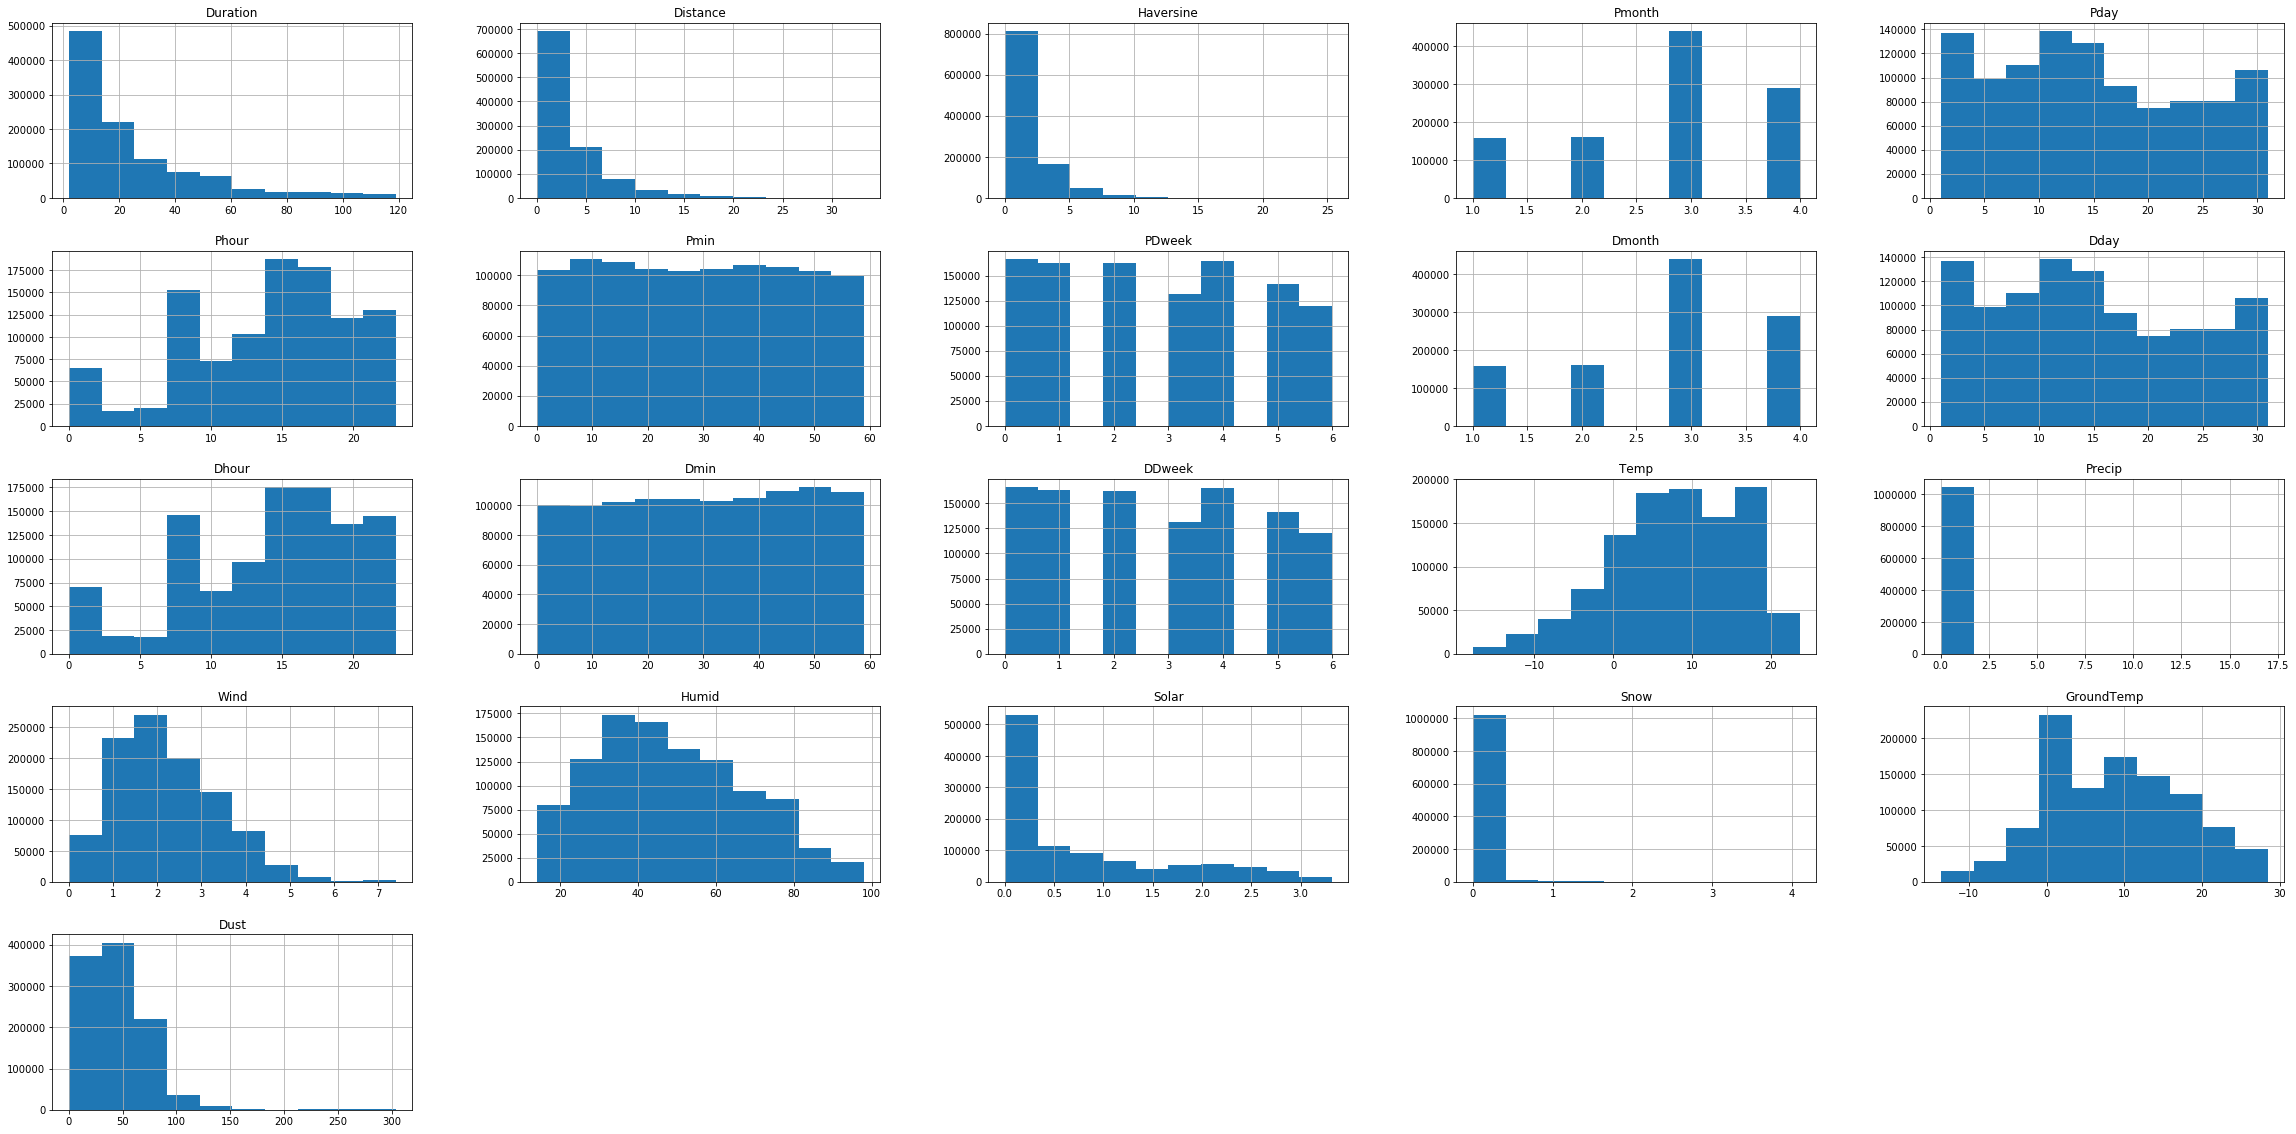

In [11]:
data.hist(column=columns,figsize=[40, 20])
plt.show()

### Observations
From the above graphs, we can observe that Duration, Distance, Haversine are right-skewed. It looks like most of the customers would like to use the bikes for shorter commutes(like under 10km).

The columns Temp, Wind, Humid, GroundTemp have a normal distribution.

Pmonth-Dmonth, Pday-Dday, Pweek-Dweek, Pmin-Dmin, Phour-Dhour graphs almost look the same because the duration of the ride is less than 2hours which means the bike was returned the same day.

From the Phour and Dhour graphs, we observe that majority of customers rent the bikes between 7 to 9 in the morning, 2 to 6 in the afternoon, and 10 to 12 in the night. Based on the timings it looks like people who rent the bikes are using them to travel to offices(jobs).

[]

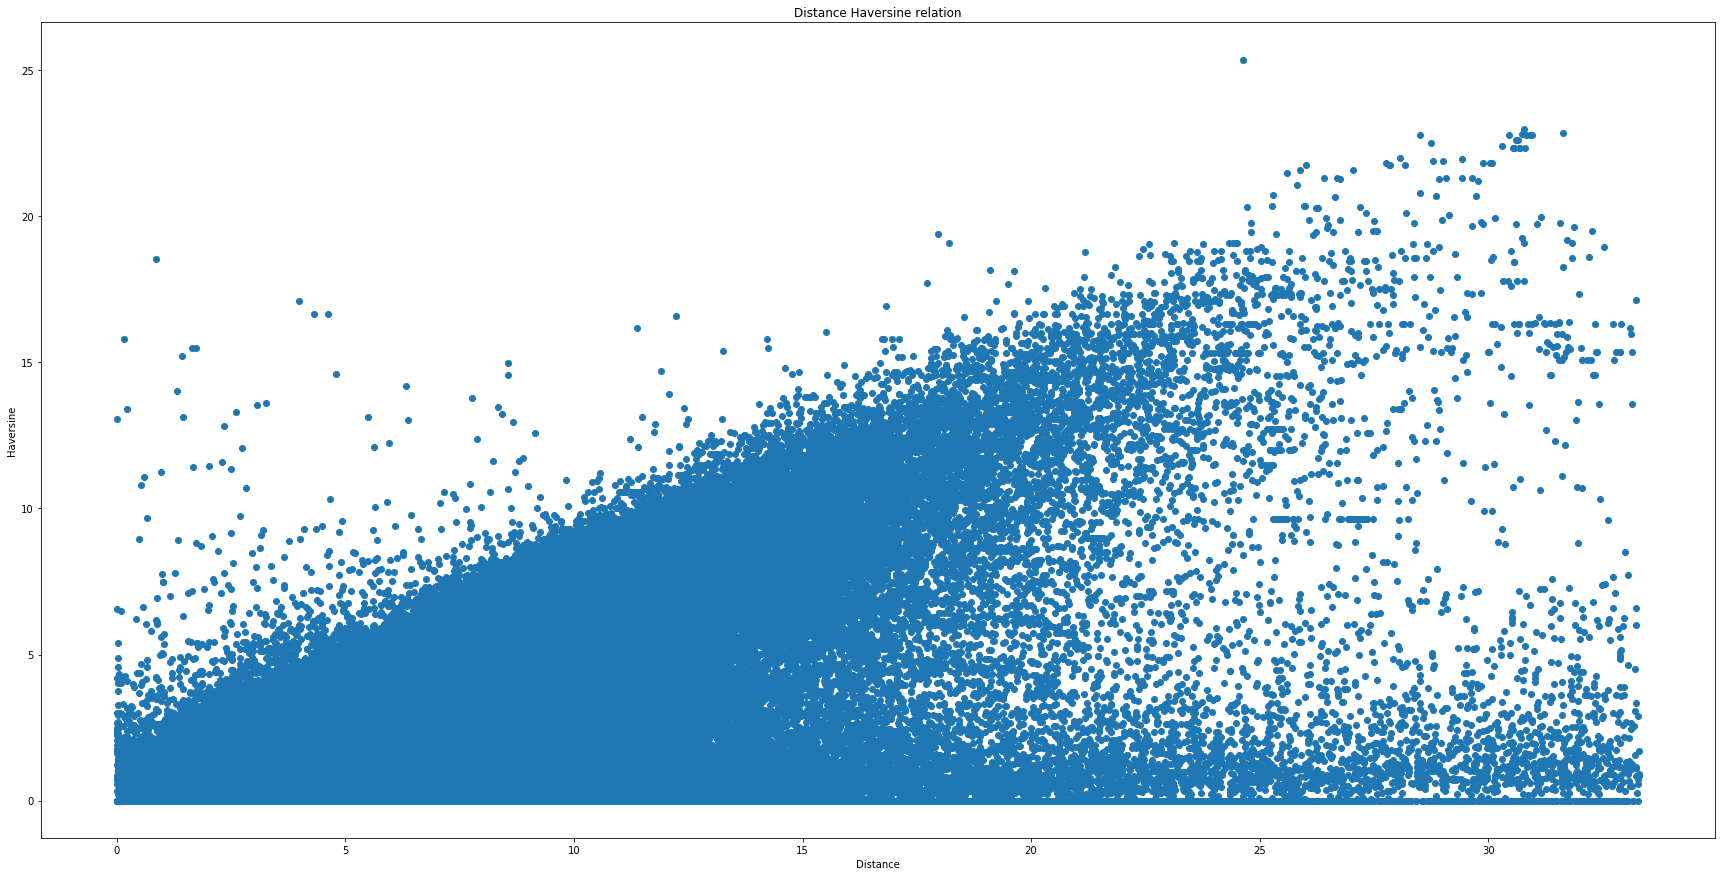

In [13]:
plt.scatter(data.Distance,data.Haversine)
plt.title("Distance Haversine relation")
plt.xlabel("Distance")
plt.ylabel('Haversine')
plt.rcParams["figure.figsize"] = (30,15)
plt.plot()

### Observations
The Distance and Haversine distance have a positive correlation. But there are few anomalies like even when the distance is greater than 20km the haversine distance is between 0 to 10km. This scenario may occur when the pick-up and drop-off locations are nearby but have no direct route.

### For some reason, the number of bikes rented in the first half of the month is greater than that of the second half. Let us try to find out why.

In [14]:
data_month1 = ( data.query('Pmonth==1') )
data_month2 = ( data.query('Pmonth==2') )
data_month3 = ( data.query('Pmonth==3') )
data_month4 = ( data.query('Pmonth==4') )

In [15]:
y1 = data_month1.groupby(by='Pday').Duration.count()
y2 = data_month2.groupby(by='Pday').Duration.count()
y3 = data_month3.groupby(by='Pday').Duration.count()
y4 = data_month4.groupby(by='Pday').Duration.count()

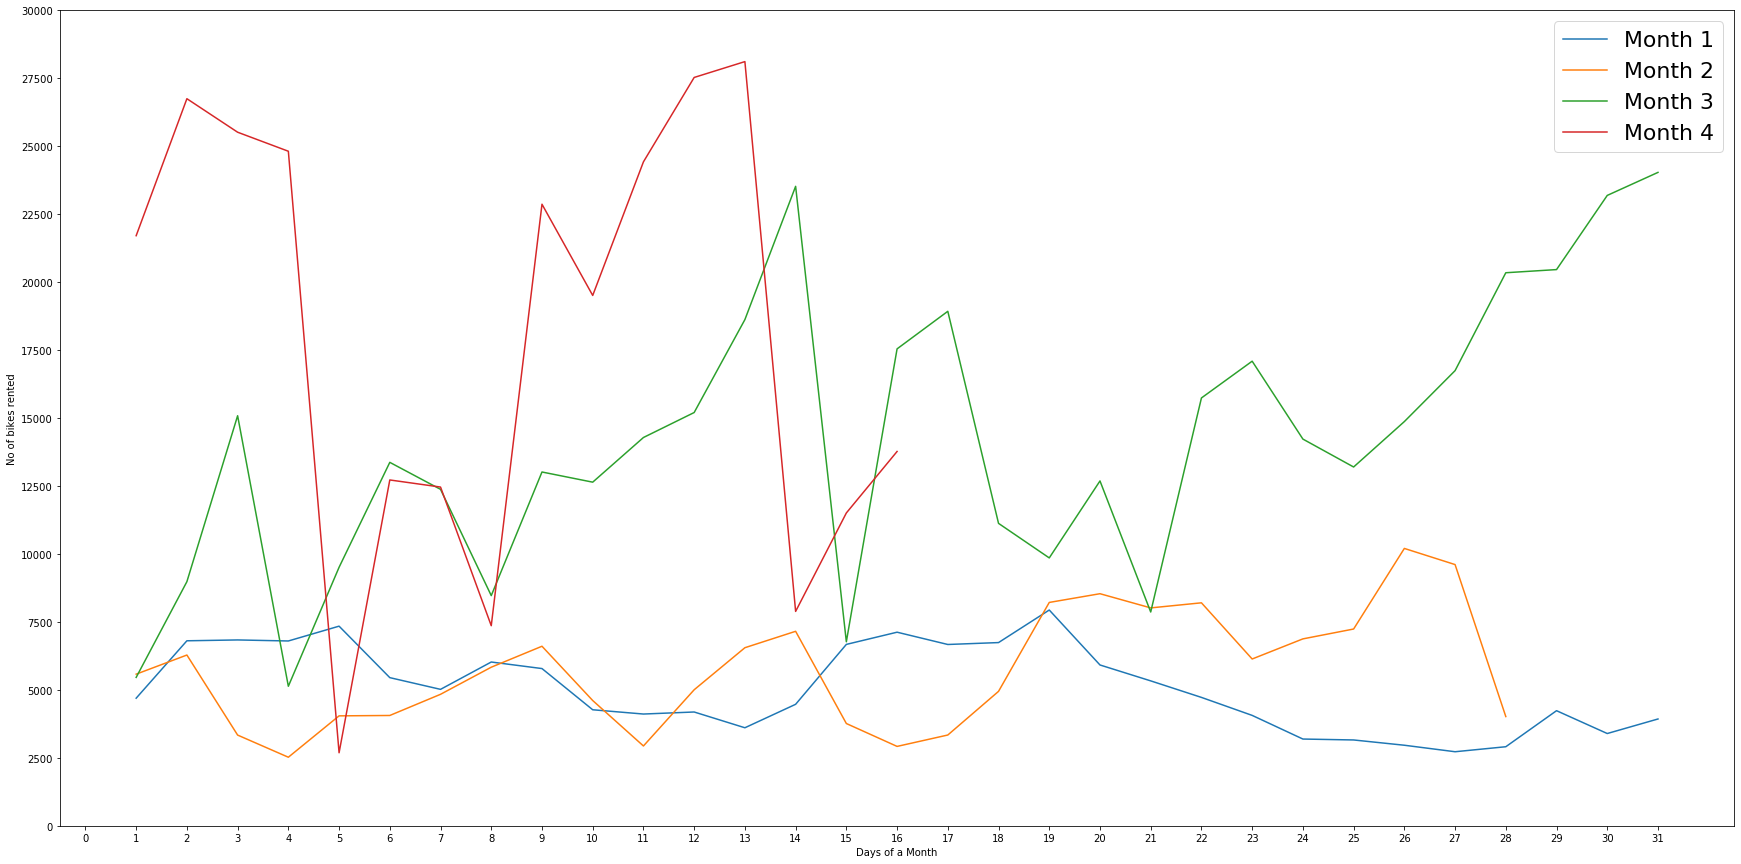

In [16]:
plt.plot(data_month1.Pday.unique(), y1, label = "Month 1")
plt.plot(data_month2.Pday.unique(), y2, label = "Month 2")
plt.plot(data_month3.Pday.unique(), y3, label = "Month 3")
plt.plot(data_month4.Pday.unique(), y4, label = "Month 4")
plt.xlabel("Days of a Month")
plt.xticks(np.arange(0, 32, step=1))
plt.ylabel("No of bikes rented")
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams.update({'font.size': 22})
plt.yticks(np.arange(0, 32000, step=2500))
plt.legend(loc='best')
plt.show()

### Observations

The above graph answers the previous question (why does the second half of Pdays have fewer bike rents than the first half). The answer is that the major contributor bike rental is month 4, and the dataset only contains half of the month's values.

The above graph also supports my previous hypothesis that most of the rented bikes are used for office commutes. As the number of bikes rented on weekdays is much higher than the number of bikes rented on weekends(sharp decrease in no of rented bikes during the weekend).

This graph also explains the relation between the temperature and the number of bikes rented. In Seoul the first 2 months Jan and Feb have very low temperatures, by the end of March(start of summer) the number of bikes rented increased exponentially.

### Let us look for how weather affects the duration

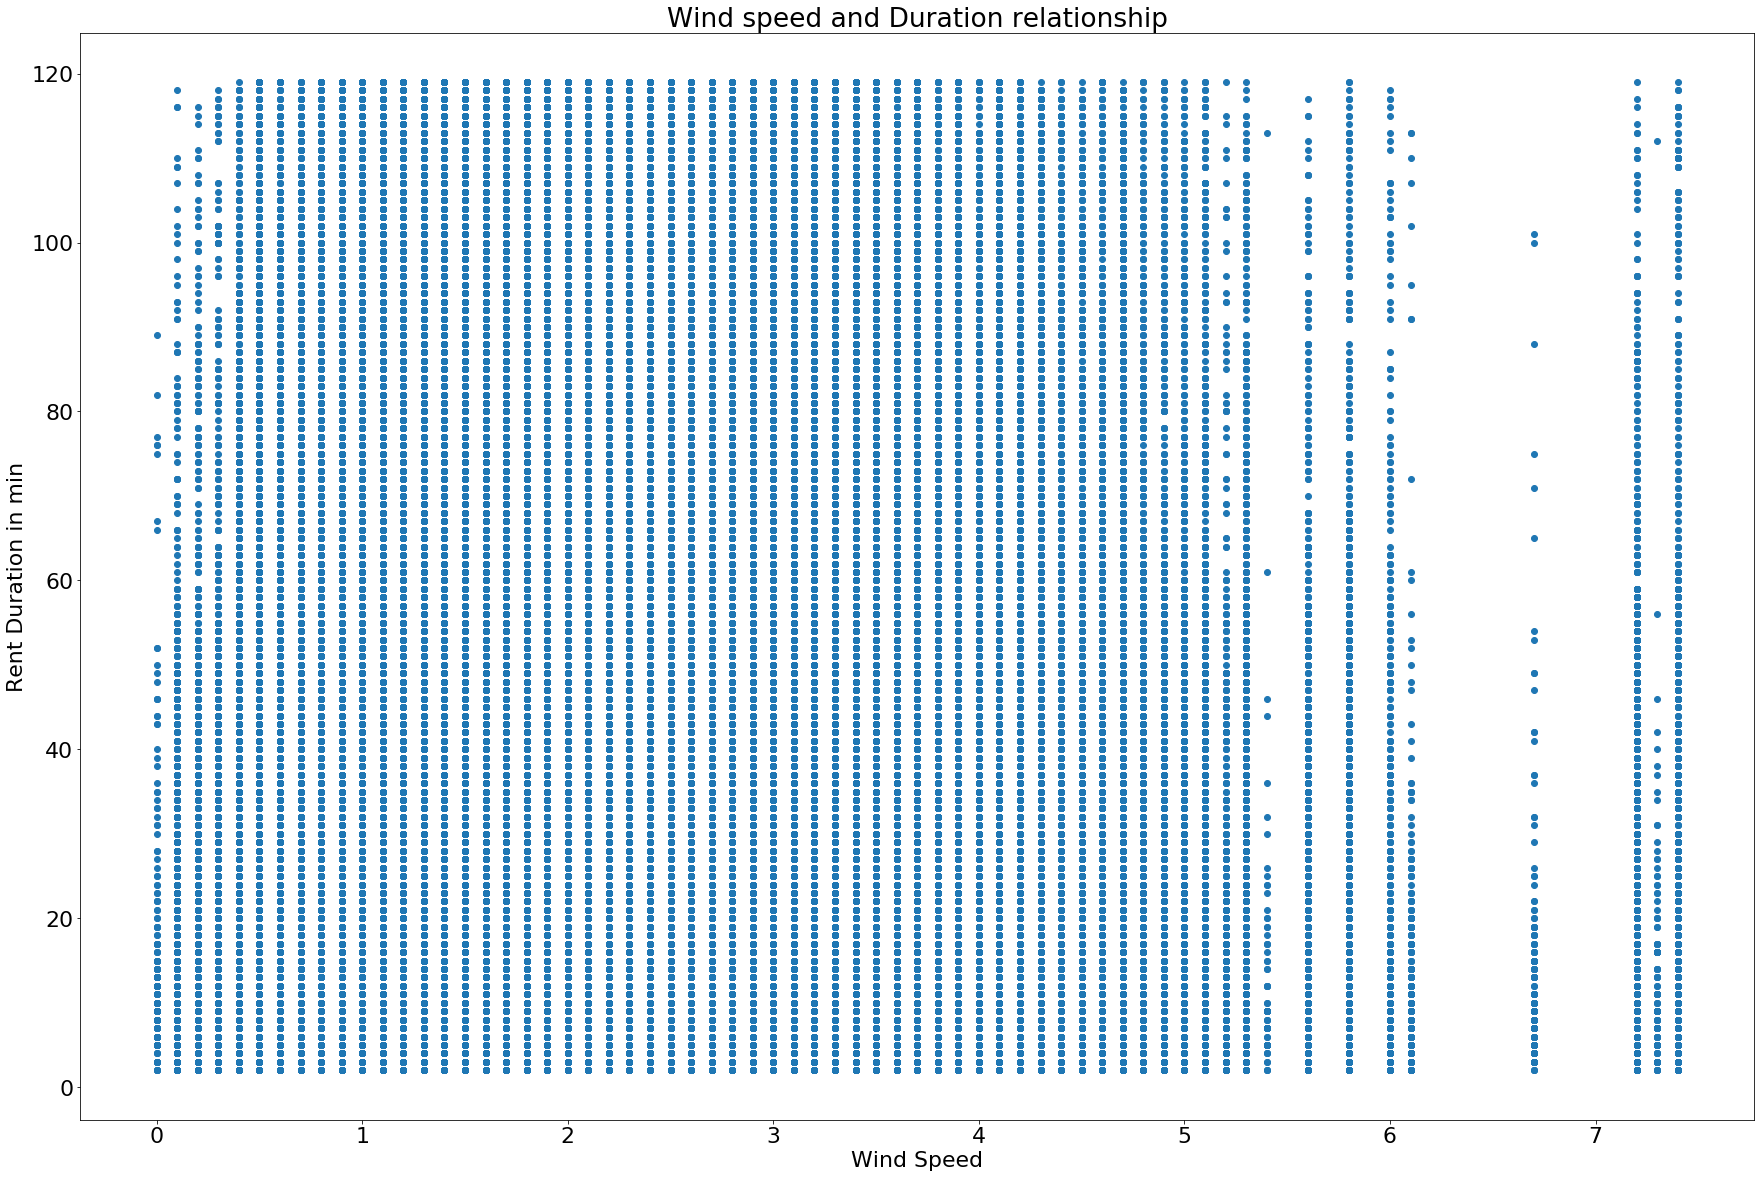

In [17]:
plt.scatter(data.Wind,data.Duration)
plt.xlabel("Wind Speed")
plt.ylabel("Rent Duration in min")
plt.title("Wind speed and Duration relationship")
plt.show()

### Observations
We can observe that as the wind speed increases the bike rental duration decreases. This might be because high wind speeds make it difficult to travel.

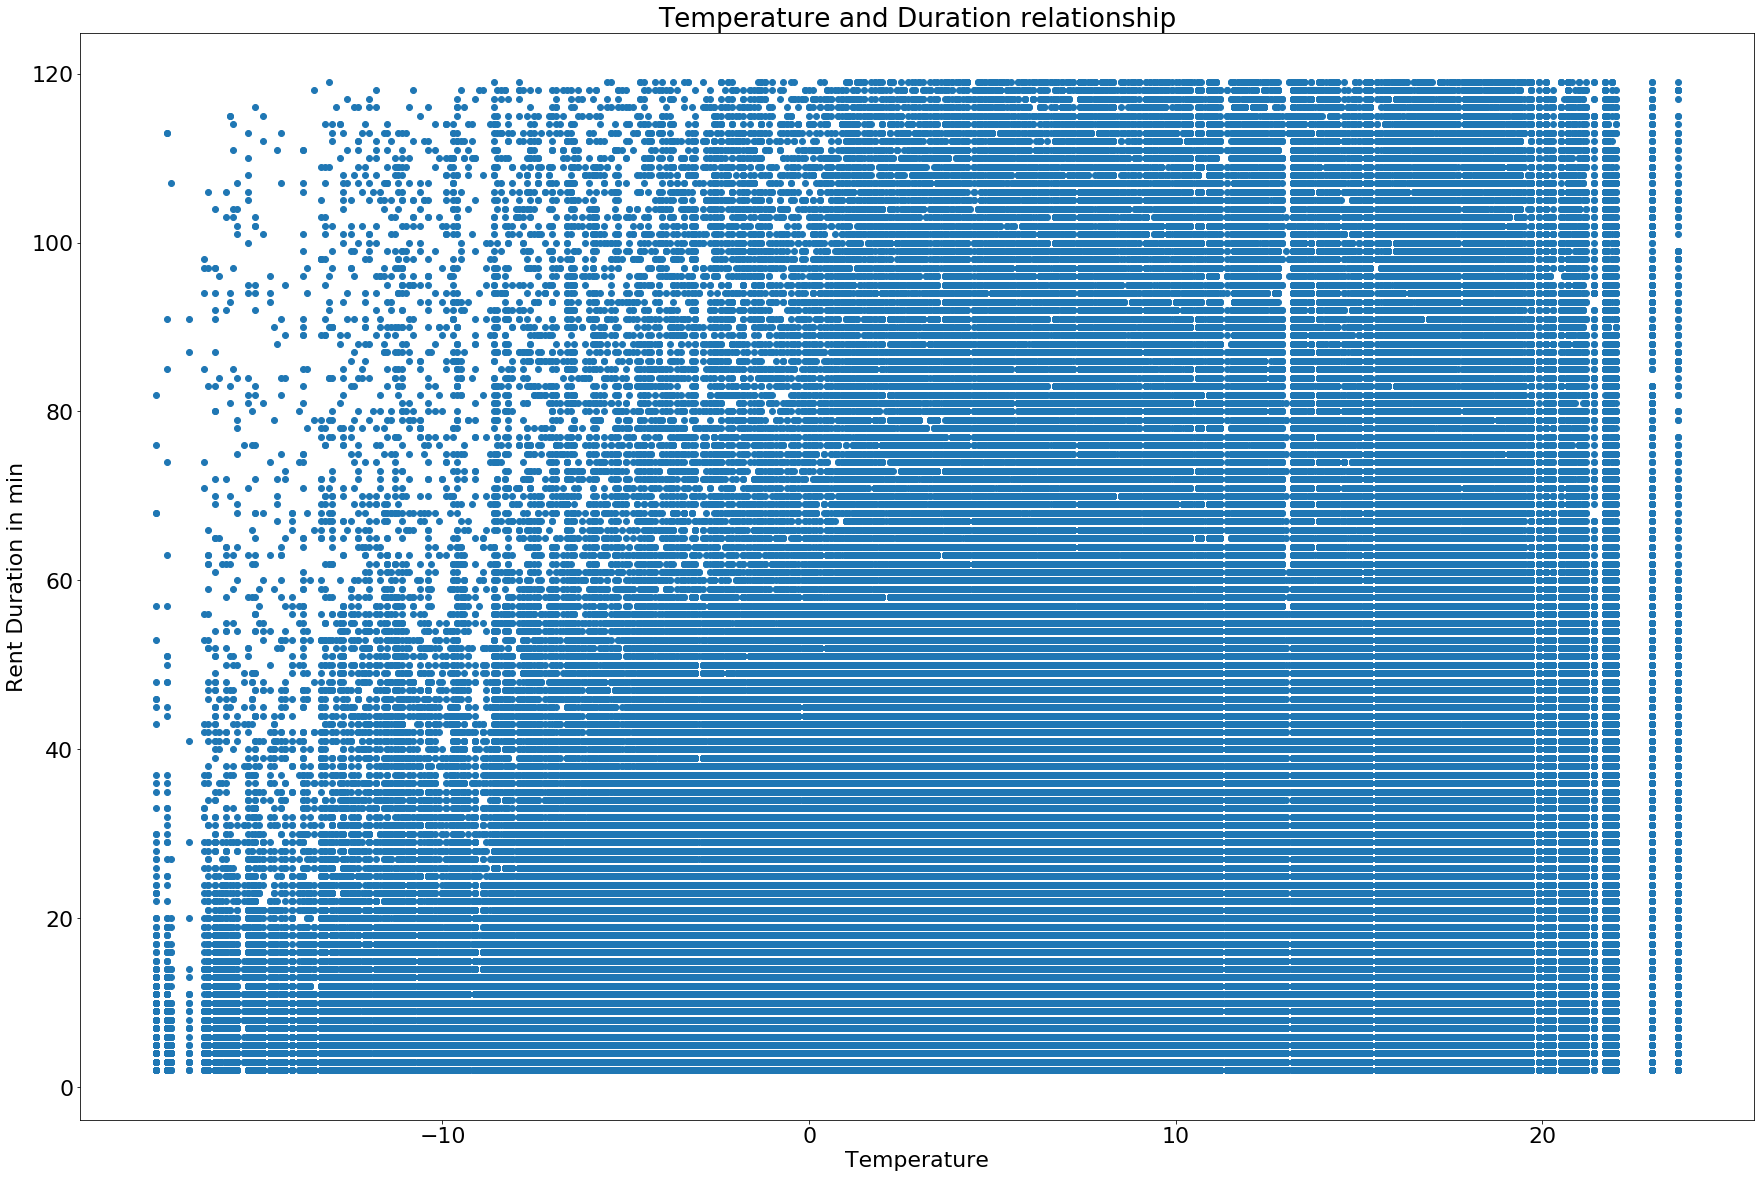

In [18]:
plt.scatter(data.Temp,data.Duration)
plt.xlabel("Temperature")
plt.ylabel("Rent Duration in min")
plt.title("Temperature and Duration relationship")
plt.show()

### Observations
The above graph provides us with information on how temperature and Rental duration correlate. We see that as temperature decreases the rental time also decreases. This might be because low temperature makes it difficult to travel.

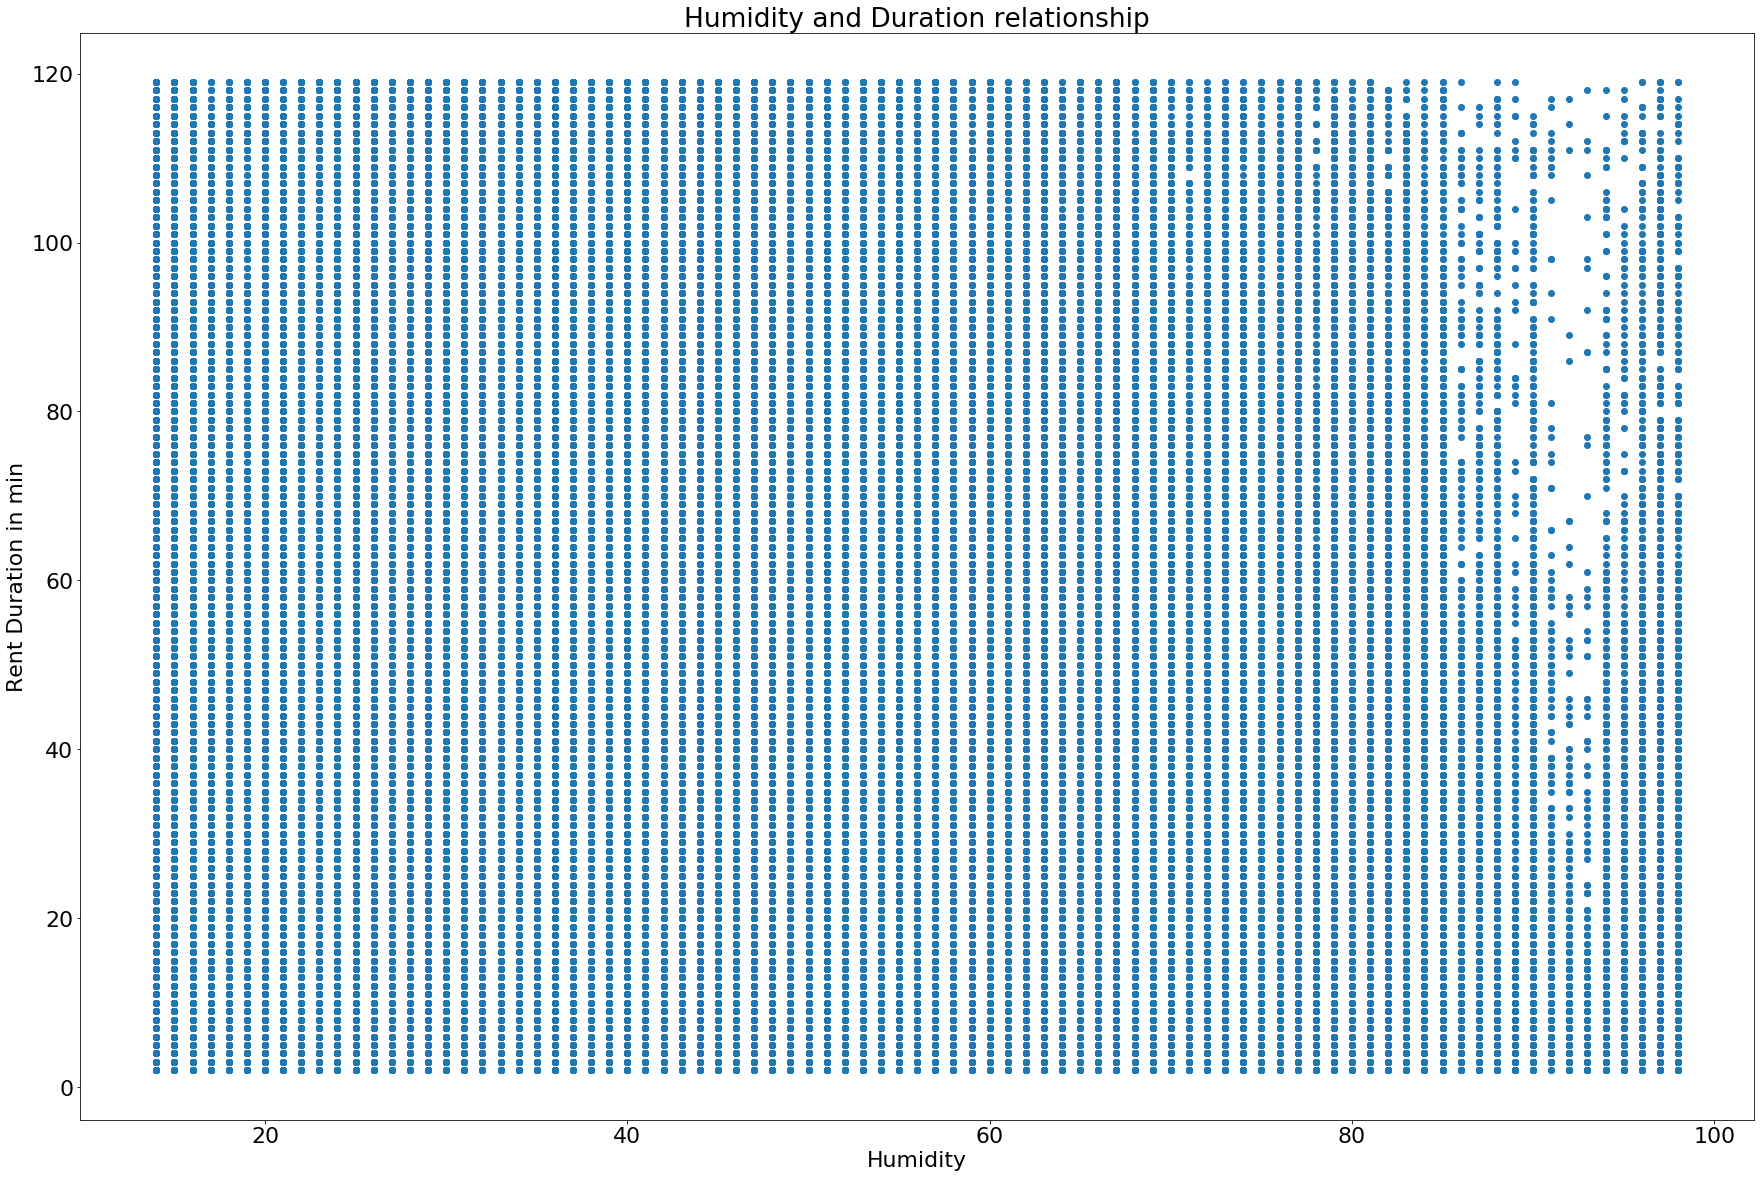

In [19]:
plt.scatter(data.Humid,data.Duration)
plt.xlabel("Humidity")
plt.ylabel("Rent Duration in min")
plt.title("Humidity and Duration relationship")
plt.show()

### Observations
The above graph provides us with information on how Humidity and Rental duration correlate. We see that as Humidity increases the rental time also decreases.

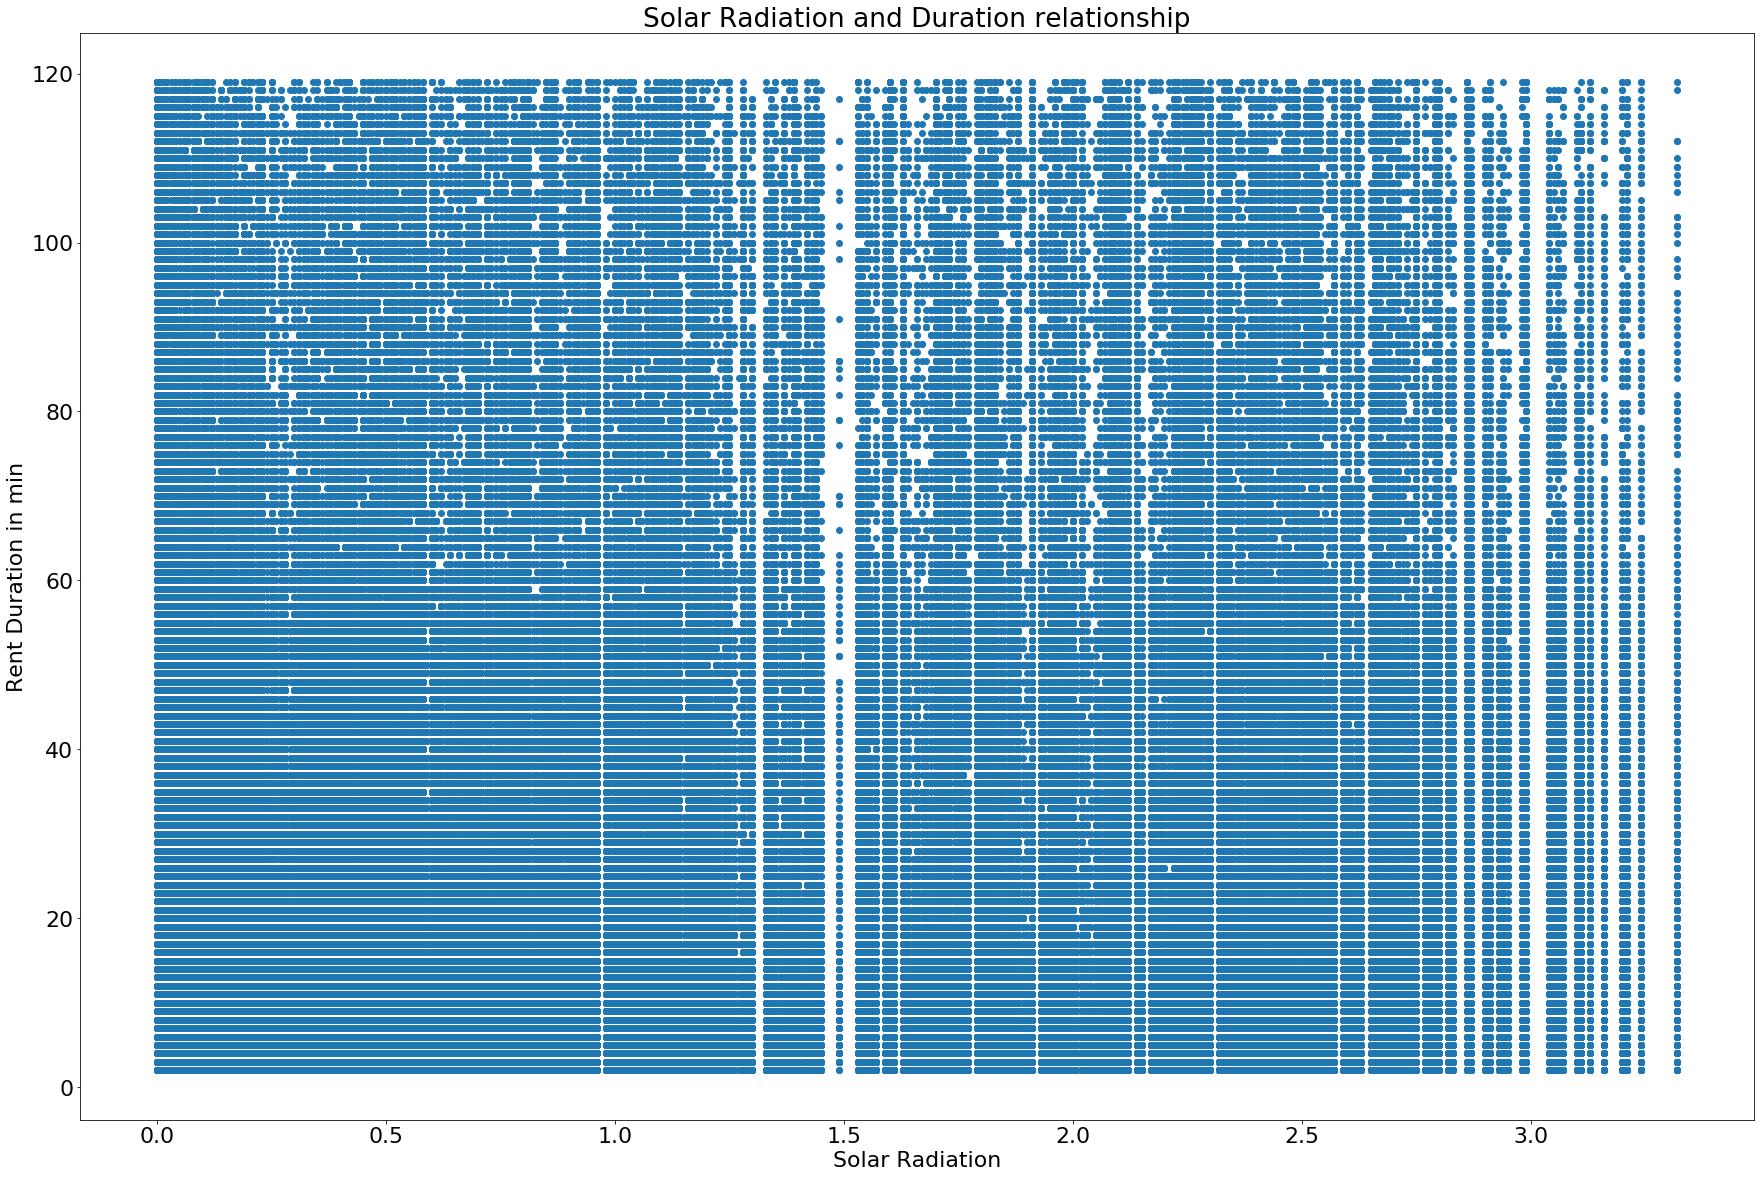

In [20]:
plt.scatter(data.Solar,data.Duration)
plt.xlabel("Solar Radiation")
plt.ylabel("Rent Duration in min")
plt.title("Solar Radiation and Duration relationship")
plt.show()

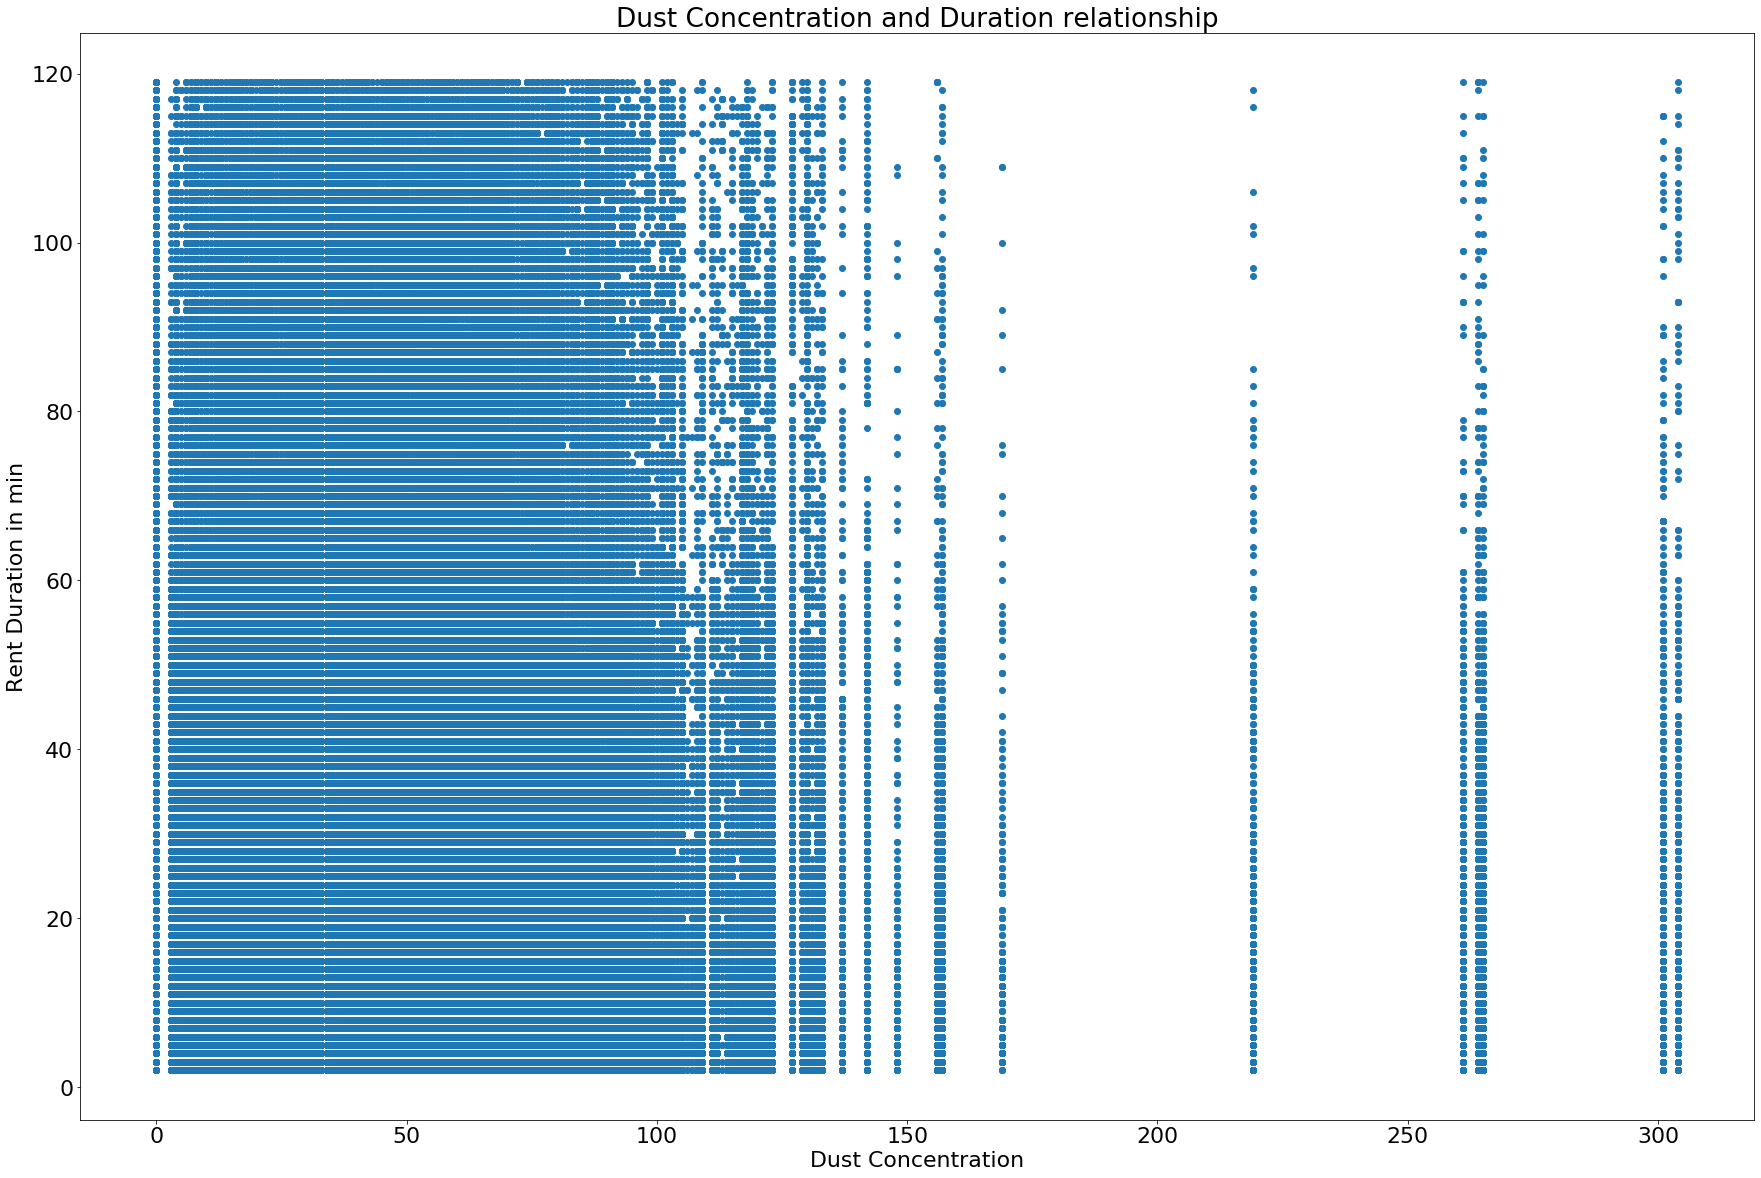

In [21]:
plt.scatter(data.Dust,data.Duration)
plt.xlabel("Dust Concentration")
plt.ylabel("Rent Duration in min")
plt.title("Dust Concentration and Duration relationship")
plt.show()

### Observations
The above graph provides us with information on how Dust concentration and Rental duration correlate. We see that as Dust concentration increases the rental time also decreases. This might be because higher dust concentration in the air makes it difficult to travel.

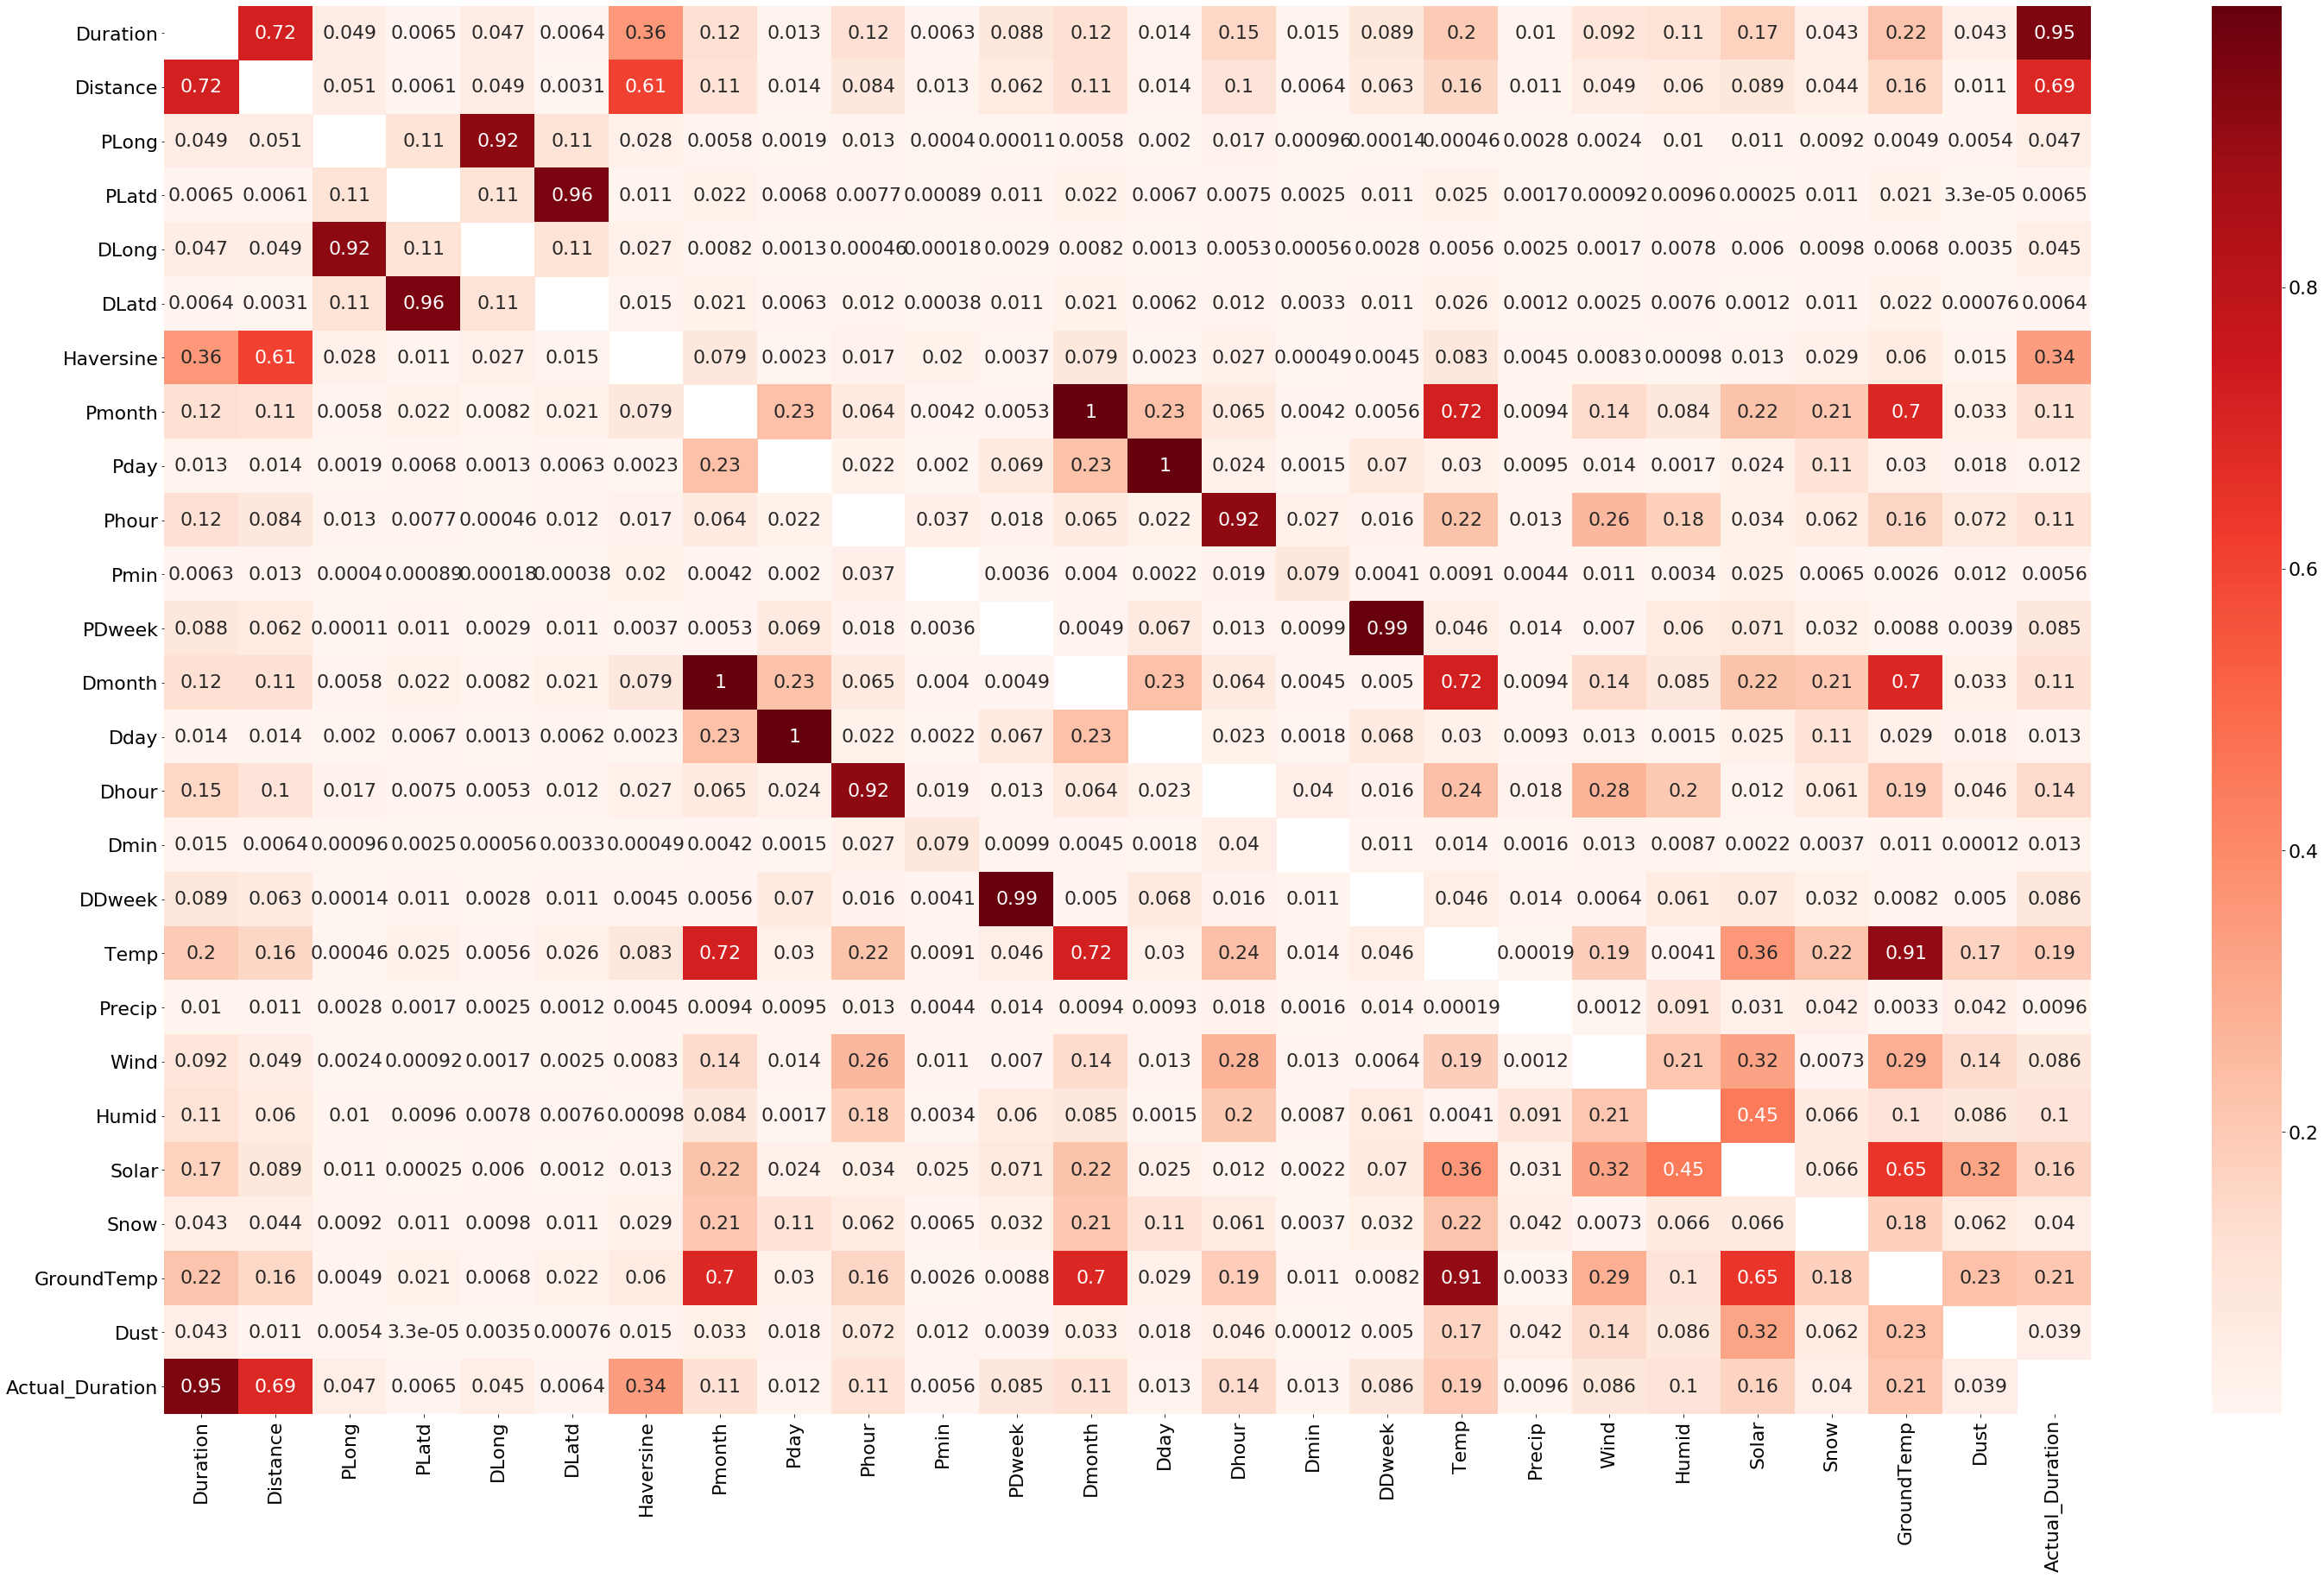

In [22]:
# create correlation matrix with abs values
corr_matrix = data.corr().abs()

filtered_corr_df = corr_matrix[(corr_matrix != 1.000)] 

plt.figure(figsize=(50,30))
sn.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

### Observations
Plong-Dlong, Platd-Dlatd, Pmonth-Dmonth, Pday-Dday, Pweek-Dweek are highly correlated as the duration of the ride is less than 2hours.

We can observe that the month and temperature(temp and groundtemp) have a +ve correlation. This might be because the month columns have values from 1 to 4 (Jan to April). In Seoul as the months go on the temperature increases.

Similarly, there is a positive correlation between solar radiation and ground temp. This is because as the solar radiation level increases the temperature increases and hence increases ground temperature.
